# Barcode Detection using OpenCV

## Image Processing DA

## Submitted by- Lakshay Almadi 18BEC0391

#### Importing the Libraries

In [1]:
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

#### Reading the Data

In [2]:
path='barcode_01.jpg'

In [3]:
img=cv2.imread(path,1)
img.shape

(450, 600, 3)

In [4]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original=img
original.shape
row,coloumns,channels=original.shape

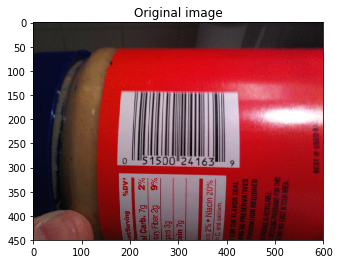

In [5]:
plt.imshow(original)
plt.title("Original image")
plt.show()

### Image Enhancement and Restoration
#### Color Conversion

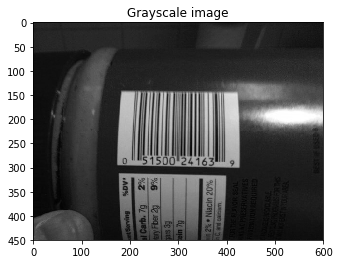

In [7]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale image")
plt.show()

#### Applying Median Filter

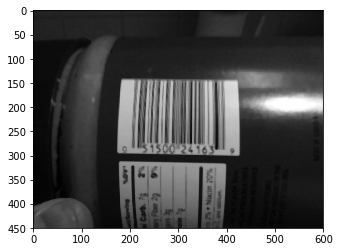

In [8]:
median=cv2.medianBlur(gray,5)
plt.imshow(median, cmap="gray")
plt.show()

#### Applying Sobel FIlter for Edge Detection

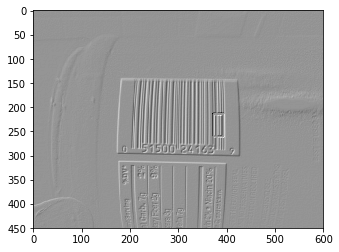

In [24]:
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)

sobel_output=gradX+gradY
plt.imshow(sobel_output,cmap="gray")
plt.show()

#### Performing Arithmetic Operations

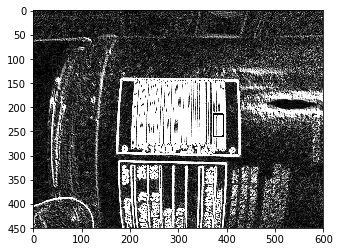

In [25]:
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient, cmap="gray")
plt.show()

# DA-2 operations start

#### Thresholding

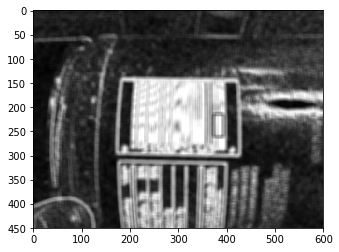

In [26]:
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
plt.imshow(blurred, cmap="gray")
plt.show()

#### Morphological Processing

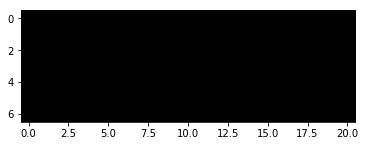

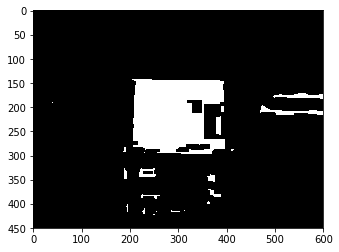

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(kernel, cmap="gray")
plt.show()
plt.imshow(closed, cmap="gray")
plt.show()

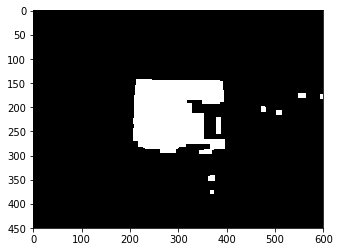

In [28]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)
plt.imshow(closed, cmap="gray")
plt.show()

#### Segmentation and keep the biggest segment

In [38]:
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

#### Getting the box surrounding the segment

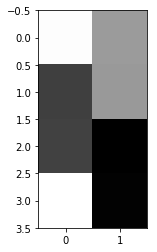

In [37]:
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)
plt.imshow(box, cmap="gray")
plt.show()

#### Surrounding the box with the barcode

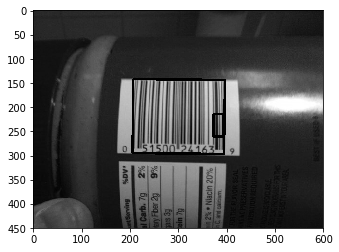

In [39]:
cv2.drawContours(gray, [box], -1, (0, 255, 0), 3)
plt.imshow(gray, cmap="gray")
plt.show()